## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this.

You will need your credentials to be set up via config file (~/.polytopeapirc) or by environment variables

In [ ]:
{
    "user_email": "<user_email>",
    "user_key": "<user_key",
}

{'user_email': '<user_email>', 'user_key': '<user_key'}

You can also set POLYTOPE_USER_EMAIL and POLYTOPE_USER_KEY in your environment. Note that the email is not required if using a token-based authentication.

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-maps
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

In [2]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "rd",
        "expver": "i7yv",
        "stream": "oper",
        "date": "20231211",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2024-05-14 15:15:43 - INFO - Key read from /Users/maaw/.polytopeapirc
2024-05-14 15:15:43 - INFO - Sending request...
{'request': 'class: rd\n'
            "date: '20231211'\n"
            'expver: i7yv\n'
            'levtype: sfc\n'
            "param: '167'\n"
            "step: '0'\n"
            'stream: oper\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-05-14 15:15:43 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:15:44 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/c25d2634-d313-4f12-8a1b-f761243b741a for status
2024-05-14 15:15:44 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:15:44 - INFO - Checking request status (c25d2634-d313-4f12-8a1b-f761243b741a)...
2024-05-14 15:15:44 - INFO - The current status of the request is 'queued'
2024-05-14 15:15:46 - INFO - The current status of the request is 'processing'
2024-05-14 15:

c25d2634-d313-4f12-8a1b-f761243b741a:   0%|          | 0.00/75.3M [00:00<?, ?B/s]

In [3]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units='celsius',
    extend='both',
)

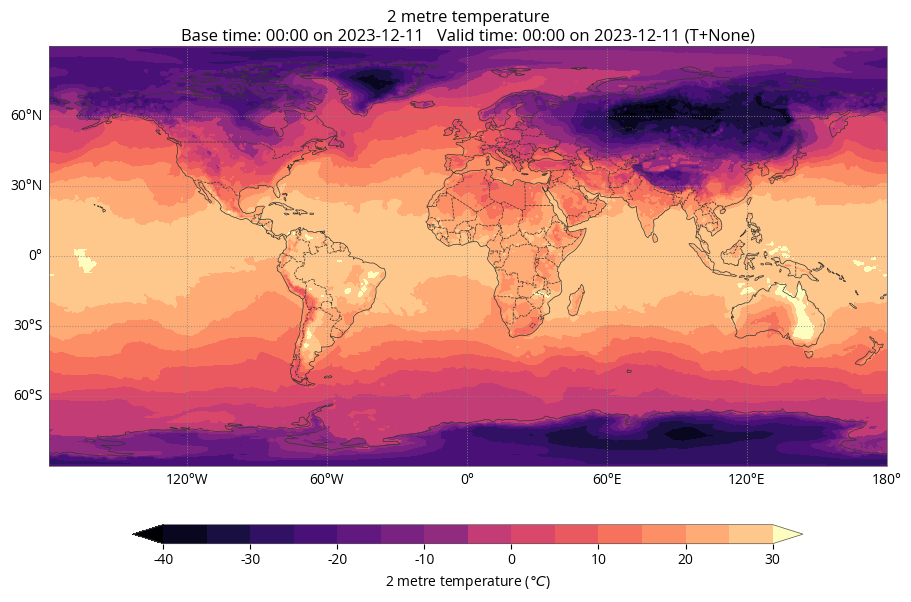

In [4]:
earthkit.maps.quickplot(data, style=style)

In [5]:
data.to_xarray()

<xarray.Dataset> Size: 526MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, values: 26306560)
Coordinates:
  * time               (time) datetime64[ns] 8B 2023-12-11
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
    latitude           (values) float64 210MB ...
    longitude          (values) float64 210MB ...
    valid_time         (time, step) datetime64[ns] 8B ...
Dimensions without coordinates: values
Data variables:
    t2m                (time, step, heightAboveGround, values) float32 105MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-14T15:16 GRIB to CDM+CF via cfgrib-0.9.1...